In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import time
import matplotlib.pyplot as plt

In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using Device : {device}")

Using Device : cpu


In [21]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [22]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [23]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

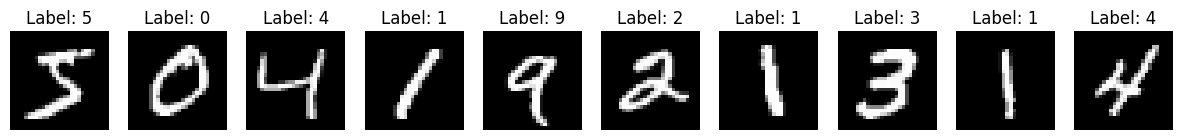

In [24]:
fig, axes = plt.subplots(1, 10, figsize=(15, 2))

for i in range(10):
    image, label = train_dataset[i]
    axes[i].imshow(image.squeeze(), cmap='gray')
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')

plt.show()

In [27]:
class HighAccuracyCNN(nn.Module):
    def __init__(self):
        super(HighAccuracyCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 3 * 3, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.relu(self.conv3(x))
        x = self.pool(x)
        x = x.view(-1, 128 * 3 * 3)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.fc3(x)

        return x

In [28]:
start_time = time.time()
model=CNN_example().to(device)
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)
num_epochs=5
for epoch in range(num_epochs):
    model.train()
    running_loss=0
    for i,(images,labels) in enumerate(train_loader):
        images,labels=images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs=model(images)
        loss=criterion(outputs,labels)
        loss.backward()
        optimizer.step()

        running_loss+=loss.item()

        if(i+1)%100==0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {running_loss/100:.4f}')
            running_loss = 0.0
end_time = time.time()
execution_time = end_time - start_time
print(f"Time taken: {execution_time:.4f} seconds")

Epoch [1/5], Step [100/938], Loss: 0.6570
Epoch [1/5], Step [200/938], Loss: 0.1555
Epoch [1/5], Step [300/938], Loss: 0.1163
Epoch [1/5], Step [400/938], Loss: 0.0814
Epoch [1/5], Step [500/938], Loss: 0.0686
Epoch [1/5], Step [600/938], Loss: 0.0829
Epoch [1/5], Step [700/938], Loss: 0.0619
Epoch [1/5], Step [800/938], Loss: 0.0554
Epoch [1/5], Step [900/938], Loss: 0.0594
Epoch [2/5], Step [100/938], Loss: 0.0474
Epoch [2/5], Step [200/938], Loss: 0.0425
Epoch [2/5], Step [300/938], Loss: 0.0451
Epoch [2/5], Step [400/938], Loss: 0.0380
Epoch [2/5], Step [500/938], Loss: 0.0365
Epoch [2/5], Step [600/938], Loss: 0.0434
Epoch [2/5], Step [700/938], Loss: 0.0351
Epoch [2/5], Step [800/938], Loss: 0.0460
Epoch [2/5], Step [900/938], Loss: 0.0407
Epoch [3/5], Step [100/938], Loss: 0.0356
Epoch [3/5], Step [200/938], Loss: 0.0281
Epoch [3/5], Step [300/938], Loss: 0.0333
Epoch [3/5], Step [400/938], Loss: 0.0274
Epoch [3/5], Step [500/938], Loss: 0.0369
Epoch [3/5], Step [600/938], Loss:

In [29]:
model.eval()
correct=0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')

Test Accuracy: 99.15%
